In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [10]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [17]:
def naive(p, q):
    psz = p.shape[0]
    qsz = q.shape[0]
    res = np.zeros((psz, qsz))
    for x in range(0, psz):
        for y in range(0, qsz):
            dif = p[x] - q[y]
            res.itemset((x,y), np.sqrt(dif.dot(dif.T)))
    return res

naive(p, q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [18]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [19]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [47]:
def with_indices(p, q):
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    
    diff = p[rows.ravel()] - q[cols.ravel()]

    distflat = np.sqrt(np.sum(diff * diff, axis=1))
    return distflat.reshape([p.shape[0], q.shape[0]])

with_indices(p_big,q_big)

array([[3.5463562 , 3.565697  , 3.49523531, ..., 3.45806434, 3.45665815,
        3.81388442],
       [4.00188263, 3.53214057, 3.27800283, ..., 3.71310672, 3.95344582,
        3.59536741],
       [4.17522292, 3.56879999, 3.41938894, ..., 4.02732215, 3.92961253,
        3.58403141],
       ...,
       [3.62521939, 3.45146476, 3.80998935, ..., 4.28665811, 3.94376699,
        3.57750727],
       [3.74235978, 3.66972067, 3.58013781, ..., 3.84275737, 3.61753849,
        3.699406  ],
       [3.94677398, 3.3584521 , 3.90542048, ..., 3.52062854, 4.00497389,
        3.44475958]])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [48]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [49]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [50]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

30.9 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.6 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
711 µs ± 7.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.56 ms ± 65 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


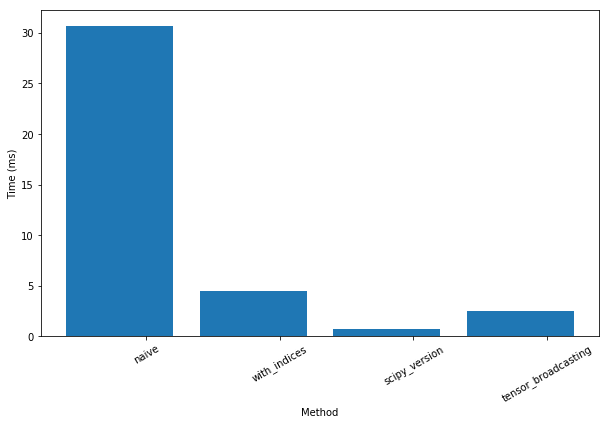

In [51]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()